# Exploratory Data Analysis and Cleaning

## Task 1: Data Understanding

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set()

# Format outputs
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = None

%matplotlib inline

In [66]:
customer_data = pd.read_csv('../Data/client_data.csv')
price_data = pd.read_csv('../Data/price_data.csv')

### Data Cleaning

In [67]:
# View first few rows of each dataframe
display(customer_data.head())
display(price_data.head())

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000,0,0.000,1.780,0.114,0.098,40.607,t,0.000,25.440,25.440,2,678.990,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.950,0,0.000,16.270,0.146,0.000,44.311,f,0.000,16.380,16.380,1,18.890,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.960,0,0.000,38.720,0.166,0.088,44.311,f,0.000,28.600,28.600,1,6.600,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.040,0,0.000,19.830,0.147,0.000,44.311,f,0.000,30.220,30.220,1,25.460,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.750,526,0.000,131.730,0.117,0.100,40.607,f,52.320,44.910,44.910,1,47.980,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151,0.000,0.000,44.267,0.000,0.000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151,0.000,0.000,44.267,0.000,0.000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151,0.000,0.000,44.267,0.000,0.000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.150,0.000,0.000,44.267,0.000,0.000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.150,0.000,0.000,44.267,0.000,0.000


In [68]:
# Show the number of rows and columns
print(customer_data.shape)
print(price_data.shape)

(14606, 26)
(193002, 8)


In [69]:
# Merge data
energy_data = pd.merge(customer_data, price_data, on='id')
energy_data.shape

(175149, 33)

In [70]:
# Explore new training_df
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

We can see that all the columns representing a date is not in the proper format so we should convert these to datetime format. There also seems to be some missing values in many columns. Let's explore these further.

In [71]:
# Convert date columns to datetime format
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date']

energy_data[date_cols] = energy_data[date_cols].apply(lambda x: x.astype('datetime64'))
for col in date_cols:
    assert energy_data[col].dtype == 'datetime64[ns]'

In [72]:
# Stats on numeric columns
energy_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000
mean,159260.579,28080.718,16095.518,1868.344,1399.782,0.967,63.075,0.137,0.050,43.130,152.790,24.567,24.564,1.292,189.245,4.998,18.135,0.097,0.142,0.052,0.028,42.929,9.459,6.096
std,573541.331,162940.034,64376.742,2387.560,3248.331,5.109,66.144,0.025,0.049,4.487,341.427,20.234,20.234,0.710,311.847,1.612,13.536,0.296,0.023,0.050,0.036,4.621,12.133,7.822
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,3.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5674.000,0.000,0.000,494.980,0.000,0.000,16.180,0.116,0.000,40.607,0.000,14.280,14.280,1.000,50.710,4.000,12.500,0.000,0.127,0.000,0.000,40.729,0.000,0.000
50%,14115.000,0.000,792.000,1112.610,314.000,0.000,18.790,0.143,0.084,44.311,37.390,21.640,21.640,1.000,112.500,5.000,13.856,0.000,0.147,0.084,0.000,44.267,0.000,0.000
75%,40763.000,0.000,3383.000,2400.350,1745.000,0.000,131.030,0.146,0.099,44.311,193.990,29.880,29.880,1.000,243.000,6.000,19.180,0.000,0.152,0.102,0.073,44.445,24.340,16.226
max,6207104.000,4154590.000,771203.000,82902.830,175375.000,30.000,599.310,0.274,0.196,59.266,15042.790,374.640,374.640,32.000,24570.650,13.000,320.000,1.000,0.281,0.230,0.114,59.445,36.491,17.458


Consumption seems to contain a few outliers that are skewing the distributions greatly. Since we are dealing with energy data, these extreme values could be normal so we cannot simply discard them.

 Let's now check for any duplicates.

In [73]:
# Check for duplicates
energy_data.duplicated().sum()

0

Let's now perform data validation to spot any mismatches.

In [74]:
# Data validation
consumes_gas = energy_data.cons_gas_12m > 0
not_gas_client = energy_data.has_gas == 'f'

display(energy_data[(consumes_gas) & (not_gas_client)][['cons_gas_12m', 'has_gas']].head())
display(energy_data[(consumes_gas) & (not_gas_client)].shape[0])

,cons_gas_12m,has_gas
2532,458306,f
2533,458306,f
2534,458306,f
2535,458306,f
2536,458306,f


634

There are 634 instances where a customer is not a gas client but consumes gas. This may be true for the same customer more than once. We should convert the `has_gas` to "true" for these customers.

In [75]:
# Convert non-gas samples that consume gas to gas clients
energy_data.loc[(consumes_gas) & (not_gas_client), 'has_gas'] = 't'

Let's now compare activation and ending dates for contracts.

In [76]:
# Compare activation and ending dates on contracts
print(f'There are {energy_data[energy_data.date_activ > energy_data.date_end].shape[0]} date contract start and end errors.')

There are 0 date contract start and end errors.


In [77]:
# Check has_gas and churn columns for inconsistency
print(energy_data.has_gas.unique())
print(energy_data.churn.unique())

['t' 'f']
[1 0]


We should convert the `has_gas` column into 0 for false, and 1 for true.

In [78]:
energy_data.has_gas.replace({'f':0, 't':1}, inplace=True)

### Exploratory Data Analysis

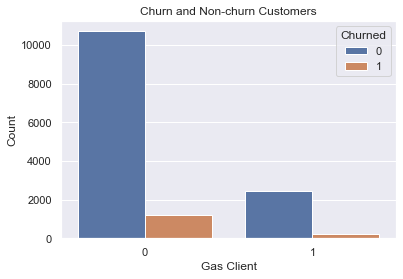

In [79]:
# Visualize churn
g = sns.countplot(x='has_gas', hue='churn', data=energy_data.drop_duplicates(subset='id'))

plt.title('Churn and Non-churn Customers')
plt.xlabel('Gas Client')
plt.ylabel('Count')
g.legend_.set_title('Churned')
plt.show()

Less than 2,000 customers out of almost 16,096 have churned. Of those, most of them tend to not be gas clients. Let's find the current churn rate.

In [80]:
# Number of churned customers
num_churned = energy_data[energy_data.churn == 1].id.nunique()

# Percent of churners
churn_rate = energy_data[energy_data.churn == 1].id.nunique() / energy_data.id.nunique()

print('The total number of churned customers is', num_churned, 'and the current churn rate is', round(churn_rate*100, 2),'%')

The total number of churned customers is 1419 and the current churn rate is 9.72 %


In [81]:
energy_data.drop_duplicates(subset='id').churn.mean()

0.09715185540188963

Almost 10% of PowerCo's clients are leaving.

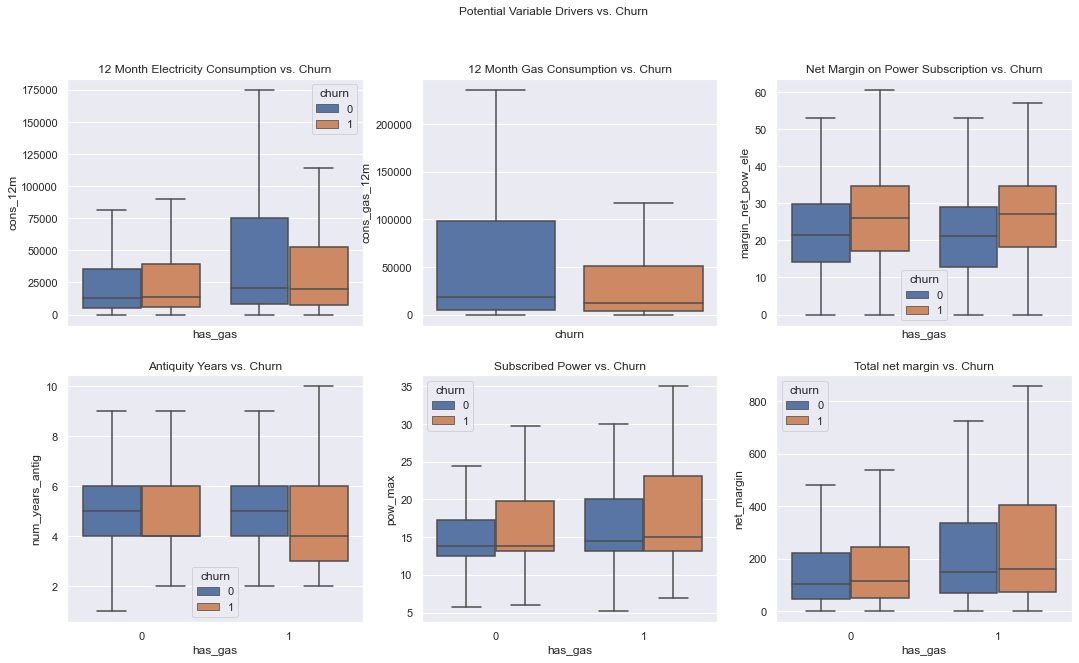

In [82]:
fig, ax = plt.subplots(2, 3, sharex=True, figsize=(18, 10))
fig.suptitle('Potential Variable Drivers vs. Churn')

sns.boxplot(x='has_gas', y='cons_12m', hue='churn', data=energy_data, sym='', ax=ax[0,0])
ax[0,0].set_title('12 Month Electricity Consumption vs. Churn')

sns.boxplot(x='churn', y='cons_gas_12m', data=energy_data.query('has_gas == 1'), sym='', ax=ax[0,1])
ax[0,1].set_title('12 Month Gas Consumption vs. Churn')

sns.boxplot(x='has_gas', y='margin_net_pow_ele', hue='churn', data=energy_data, sym='', ax=ax[0,2])
ax[0,2].set_title('Net Margin on Power Subscription vs. Churn')

sns.boxplot(x='has_gas', y='num_years_antig', hue='churn', data=energy_data, sym='', ax=ax[1,0])
ax[1,0].set_title('Antiquity Years vs. Churn')

sns.boxplot(x='has_gas', y='pow_max', hue='churn', data=energy_data, sym='', ax=ax[1,1])
ax[1,1].set_title('Subscribed Power vs. Churn')

sns.boxplot(x='has_gas', y='net_margin', hue='churn', data=energy_data, sym='', ax=ax[1,2])
ax[1,2].set_title('Total net margin vs. Churn')

plt.show()

Customers who churned have lower electricity and gas consumption levels than non-churners, except they are about even if the client does not use gas.

Customers who have a higher net margin seem to churn more. Perhaps customers are more inclined to churn if their net margin on power subscription is higher than the non-churner average? Whether or not the client uses gas does not differentiate the groups by much in this case.

There doesn't seem to be much of a difference when comparing number of antiquity and churn.

We can see that subscribed power and total net margin seems to be an influencial factor for churn, with the former being slightly stronger.

Let's now look into the distributions of the variables we plotted.

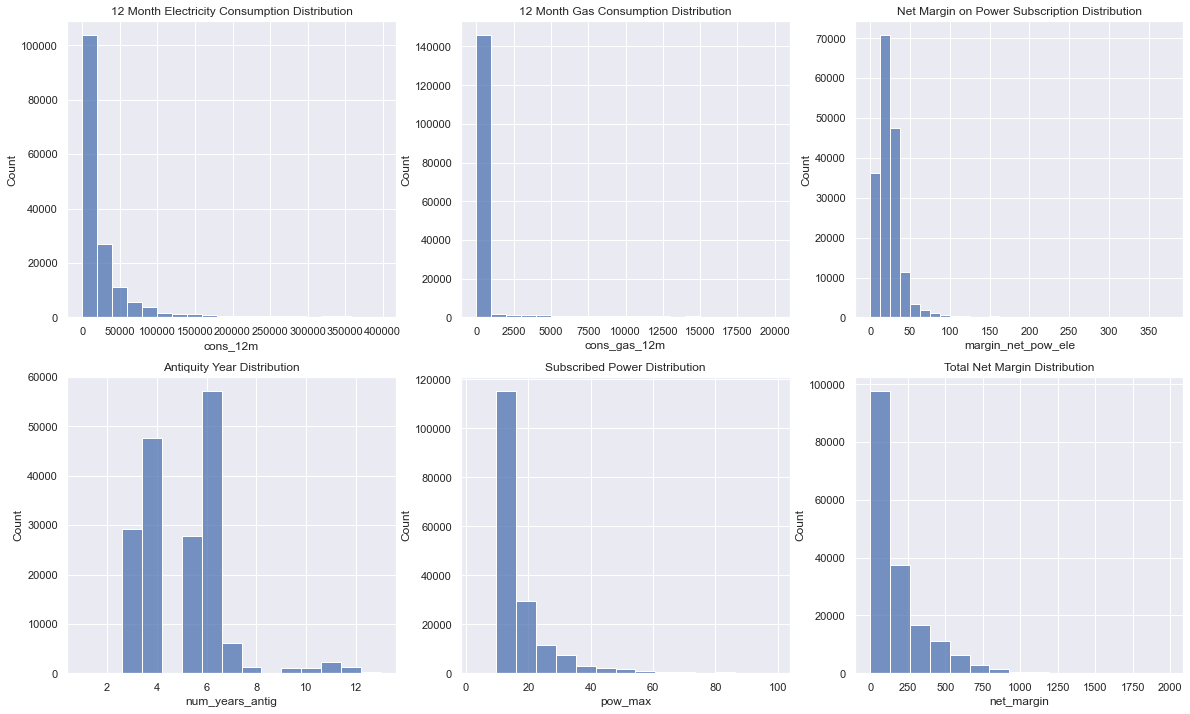

In [83]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(energy_data.query('cons_12m < 400000').cons_12m, bins=20, ax=ax[0,0])
ax[0,0].set_title('12 Month Electricity Consumption Distribution')

sns.histplot(energy_data.query('cons_gas_12m < 20000').cons_gas_12m, bins=20, ax=ax[0,1])
ax[0,1].set_title('12 Month Gas Consumption Distribution')

sns.histplot(energy_data.margin_net_pow_ele, bins=30, ax=ax[0,2])
ax[0,2].set_title('Net Margin on Power Subscription Distribution')

sns.histplot(energy_data.num_years_antig, bins=15, ax=ax[1,0])
ax[1,0].set_title('Antiquity Year Distribution')

sns.histplot(energy_data.query('pow_max < 100').pow_max, bins=15, ax=ax[1,1])
ax[1,1].set_title('Subscribed Power Distribution')

sns.histplot(energy_data.query('net_margin < 2000').net_margin, bins=15, ax=ax[1,2])
ax[1,2].set_title('Total Net Margin Distribution')

plt.show()

## Task 2: Is Price Sensitivity Correlated with Churn?

Approach:

The client data given to us by PowerCo is cross sectional, whereas the price data is panel data. Normally, price sensitivity, or elasticity, is calculated as
$$
\epsilon = \frac{\%\Delta Q}{\%\Delta P}
$$

that is, percent change in quantity over percent change in price. Since we cannot compute quantity over time, we will define price sensitivity as
$$
\epsilon = \frac{Q}{P}* \frac{1}{k}
$$

where $k$ represents a scalar for easier interpretability.

In [84]:
# Compute average energy and power price for all periods
energy_data['price_var'] = energy_data[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean(axis=1)
energy_data['price_fix'] = energy_data[['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].mean(axis=1)

# Compute total consumption
energy_data['total_cons'] = energy_data[['cons_12m', 'cons_gas_12m']].sum(axis=1)

In [85]:
energy_data[['cons_12m', 'cons_gas_12m', 'total_cons']].iloc[200:203]

,cons_12m,cons_gas_12m,total_cons
200,786536,80583,867119
201,786536,80583,867119
202,786536,80583,867119


In [86]:
price_analysis = energy_data.groupby(['id', 'price_date']).agg(
    total_cons = ('total_cons', 'mean'),
    avg_price_var = ('price_var', 'mean'),
    avg_price_fix = ('price_fix', 'mean'),
    ).reset_index()

# Multiply average prices with scalar
price_analysis['avg_price_var_scaled'] = price_analysis['avg_price_var'].mul(100_000)
price_analysis['avg_price_fix_scaled'] = price_analysis['avg_price_fix'].mul(100_000)

price_analysis.head(12)

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.000,0.100,27.044,10010.167,2704397.960
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.000,0.100,27.044,10010.167,2704397.960
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.000,0.103,27.153,10256.067,2715259.000
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.000,0.103,27.153,10256.067,2715259.000
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.000,0.103,27.153,10256.067,2715259.000
5,0002203ffbb812588b632b9e628cc38d,2015-06-01,22034.000,0.103,27.153,10256.067,2715259.000
6,0002203ffbb812588b632b9e628cc38d,2015-07-01,22034.000,0.103,27.153,10256.067,2715259.000
7,0002203ffbb812588b632b9e628cc38d,2015-08-01,22034.000,0.098,27.153,9843.267,2715259.000
8,0002203ffbb812588b632b9e628cc38d,2015-09-01,22034.000,0.098,27.153,9843.267,2715259.000
9,0002203ffbb812588b632b9e628cc38d,2015-10-01,22034.000,0.098,27.153,9843.267,2715259.000


In [87]:
# Compute price sensitivities and divide by scalar
price_analysis['price_sens_var'] = price_analysis['total_cons'].div(price_analysis['avg_price_var_scaled'])
price_analysis['price_sens_fix'] = price_analysis['total_cons'].div(price_analysis['avg_price_fix_scaled'])
price_analysis.head()

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.000,0.100,27.044,10010.167,2704397.960,2.201,0.008
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.000,0.100,27.044,10010.167,2704397.960,2.201,0.008
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008


In [88]:
# Drop rows where price is 0
price_analysis_clean = price_analysis[(price_analysis['avg_price_var'] != 0) & (price_analysis['avg_price_fix'] != 0)]
price_analysis_clean.describe()

,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix
count,173818.000,173818.000,173818.000,173818.000,173818.000,173818.000,173818.000
mean,188399.415,0.075,19.642,7477.934,1964229.619,23.812,0.099
std,670138.239,0.024,6.172,2431.079,617219.729,86.129,0.370
min,0.000,0.023,4.980,2272.733,498000.000,0.000,0.000
25%,6183.000,0.050,14.756,4981.133,1475564.372,0.938,0.004
50%,16341.000,0.084,14.815,8368.133,1481490.332,2.341,0.009
75%,51282.000,0.099,27.044,9901.367,2704397.960,6.722,0.024
max,6799539.000,0.163,34.677,16319.300,3467729.600,1480.575,4.590


In [89]:
# Merge churn values
price_analysis_clean = price_analysis_clean.merge(energy_data[['id', 'price_date', 'churn']], on=['id', 'price_date'])
price_analysis_clean.head()

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.000,0.100,27.044,10010.167,2704397.960,2.201,0.008,0
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.000,0.100,27.044,10010.167,2704397.960,2.201,0.008,0
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008,0
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008,0
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.000,0.103,27.153,10256.067,2715259.000,2.148,0.008,0


In [90]:
price_churn_analysis = price_analysis_clean.groupby('id').mean().reset_index()
price_churn_analysis.head()

,id,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix,churn
0,0002203ffbb812588b632b9e628cc38d,22034.000,0.100,27.134,10043.083,2713448.827,2.195,0.008,0.000
1,0004351ebdd665e6ee664792efc4fd13,4060.000,0.049,14.795,4880.883,1479515.012,0.832,0.003,0.000
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.000,0.061,15.107,6051.950,1510656.999,1.254,0.005,0.000
3,00114d74e963e47177db89bc70108537,11272.000,0.049,14.756,4930.861,1475564.345,2.286,0.008,0.000
4,0013f326a839a2f6ad87a1859952d227,267414.000,0.102,27.153,10217.950,2715259.000,26.180,0.098,0.000


In [91]:
# Separate retained and churned clients for plotting
price_churn_analysis_0 = price_churn_analysis.query('churn == 0')
price_churn_analysis_1 = price_churn_analysis.query('churn == 1')

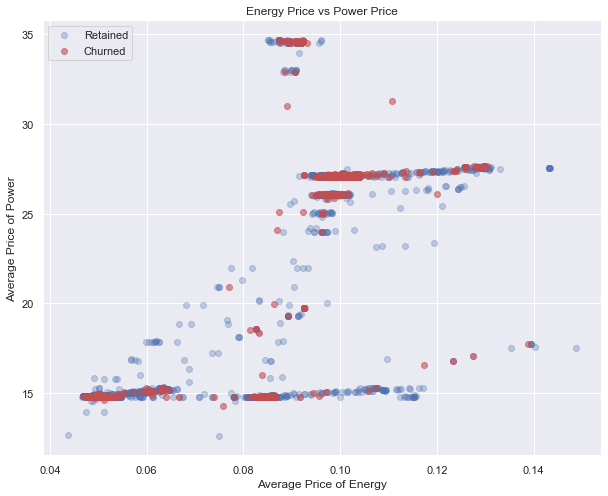

In [92]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['avg_price_var'], price_churn_analysis_0['avg_price_fix'], c='b', label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['avg_price_var'], price_churn_analysis_1['avg_price_fix'], c='r', label='Churned', alpha=0.6)

plt.xlabel('Average Price of Energy')
plt.ylabel('Average Price of Power')
plt.title('Energy Price vs Power Price')
plt.legend(loc='upper left')
plt.show()

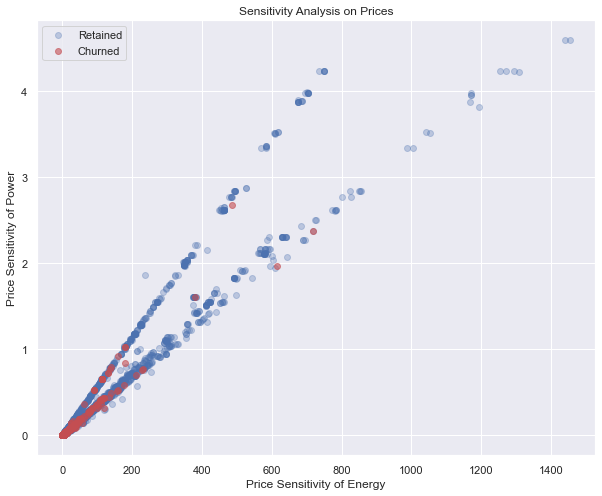

In [93]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['price_sens_var'], price_churn_analysis_0['price_sens_fix'], c='b', label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['price_sens_var'], price_churn_analysis_1['price_sens_fix'], c='r', label='Churned', alpha=0.6)

plt.xlabel('Price Sensitivity of Energy')
plt.ylabel('Price Sensitivity of Power')
plt.title('Sensitivity Analysis on Prices')
plt.legend(loc='upper left')
plt.show()

From the visualizations, it seems that clients are more sensitive to price changes in energy than in power.

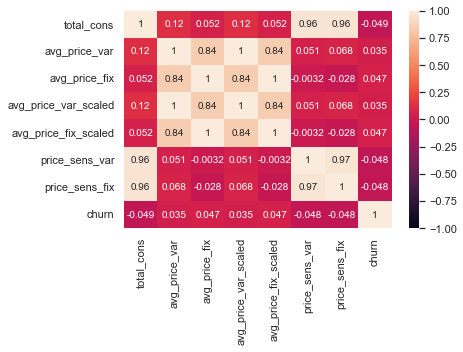

In [94]:
sns.heatmap(price_churn_analysis.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

The heatmap tells us that price sensitivity and churn have little to no correlation. However, since we had to define our own definition of price sensitivity and the scatterplots above dictate there may be some relationship, this is likely not the case.

## Task 3: Key Findings

- Around 9.7% of PowerCo's clients are churning.
- It is difficult to determine whether or not price sensitivity and churn are correlated with the current data. If PowerCo has panel data for their clients, it is possible to compute the average client price sensitivity utilizing the real formula.
- More clients seem to churn as a result of increases in the price of energy rather than power. In other words, PowerCo could likely get away with increasing power prices without any losing any clients.
- Customers who churned have lower electricity and gas consumption levels than non-churners, except consumption is about even if the client does not use gas.
- Customers who have a higher net margin seem to churn more. Perhaps customers are more inclined to churn if their net margin on power subscription is higher than the non-churner average? Whether or not the client uses gas does not differentiate the groups by much in this case.
- There doesn't seem to be much of a difference when comparing number of antiquity and churn.
- We can see that subscribed power and total net margin seems to be an influencial factor for churn, with the former being slightly stronger.

# Save Cleaned Data to Pickle

In [95]:
energy_data.to_pickle('../Data/client_data_cleaned.pkl')
price_churn_analysis.to_pickle('../Data/price_churn_analysis.pkl')